In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('21_Пермь.csv') as P:
    P = csv.reader(P, delimiter = ',')
    p = list(P)
a = np.array(p[1:][:], dtype = float)
print(a)

[[ 1.866e+03 -9.600e+00 -1.600e+01 ... -2.600e+00 -1.090e+01  1.900e+00]
 [ 1.867e+03 -1.530e+01 -1.360e+01 ... -3.300e+00 -1.340e+01  1.800e+00]
 [ 1.868e+03 -1.880e+01 -1.460e+01 ... -5.000e+00 -1.190e+01  1.900e+00]
 ...
 [ 2.017e+03 -1.510e+01 -1.140e+01 ... -1.300e+00 -7.400e+00  2.900e+00]
 [ 2.018e+03 -1.120e+01 -1.190e+01 ... -4.900e+00 -9.800e+00  2.500e+00]
 [ 2.019e+03 -1.130e+01 -1.030e+01 ...  9.999e+02  9.999e+02  9.999e+02]]


Выбор элементов для обработки 

In [3]:
x = []
y = []

for i in range(18,30):
    x.append(a[i][0])
    y.append(a[i][4])
    
print(x)
print(y)

[1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0]
[-2.5, 0.2, 1.7, 2.4, 7.0, 5.2, 1.8, -0.6, -0.5, 1.3, -1.0, -1.4]


Интерполяционный полином в форме Лагранжа

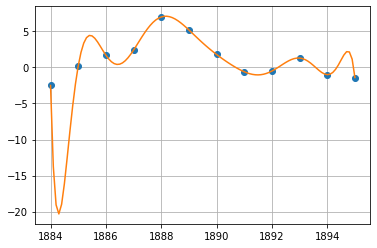

In [4]:
def Lag(x,y,k):
    L = 0
    for i in range(12):
        P = 1
        for j in range(12):
            if i != j:
                P = P*(k - x[j])/(x[i]-x[j])
        L += y[i]*P
    return L

x_new = np.arange(np.min(x),np.max(x)+0.1,0.1)
y_new = [Lag(x,y,i) for i in x_new]
plt.plot(x,y,'o',x_new,y_new)
plt.grid(True)
plt.show()


In [5]:
x_list = []
y_list = []
for i in range(6):
    x_list.append(x[i])
    y_list.append(y[i])
    
print(x_list)
print(y_list)

[1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0]
[-2.5, 0.2, 1.7, 2.4, 7.0, 5.2]


Таблица конеччных разностей

In [6]:
delta = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        delta[0][j] = y_list[j+1] - y_list[j]
for i in range(1,5):
    for j in range(5-i):
        delta[i][j] = delta[i-1][j+1] - delta[i-1][j]
        
print(delta)

[[  2.7   1.5   0.7   4.6  -1.8]
 [ -1.2  -0.8   3.9  -6.4   0. ]
 [  0.4   4.7 -10.3   0.    0. ]
 [  4.3 -15.    0.    0.    0. ]
 [-19.3   0.    0.    0.    0. ]]


Первая интерполяционная форма Ньютона

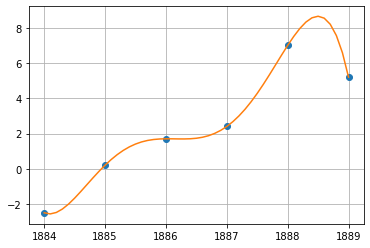

In [7]:
def Auxiliary_Function(k,x):
    s = 1
    for i in range(k):
        s = s*(x - x_list[i])/(i+1)
    return s

def Newton_first_interpolation_form(x):
    p = y[0]
    for i in range(5):
        p += delta[i][0] * Auxiliary_Function(i+1,x)
    return p

x_new = np.arange(np.min(x_list),np.max(x_list)+0.1,0.1)
y_new = [Newton_first_interpolation_form(i) for i in x_new]
plt.plot(x_list,y_list,'o',x_new,y_new)
plt.grid(True)
plt.show()

Вторая интерполяционная форма Ньютона

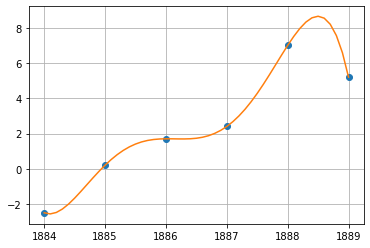

In [8]:
x_expanded = x_list[::-1]

def Auxiliary_Function(k,x):
    s = 1
    for i in range(k):
        s = s*(x - x_expanded[i])/(i+1)
    return s

def Newton_second_interpolation_form(x):
    p = y[5]
    for i in range(5):
        p += delta[i][4-i] * Auxiliary_Function(i+1,x)
    return p

x_new = np.arange(np.min(x_list),np.max(x_list)+0.1,0.1)
y_new = [Newton_second_interpolation_form(i) for i in x_new]
plt.plot(x_list,y_list,'o',x_new,y_new)
plt.grid(True)
plt.show()

Аппроксимация степенным полиномом

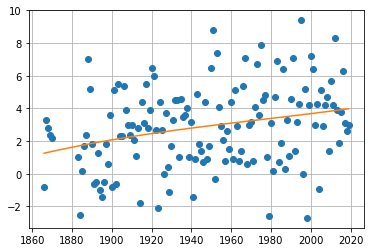

In [26]:
X = []
Y = []
m = 4 # там 5 работает некрасиво :-(
dl = len(a)
#print (dl)

for i in range(dl):
    #X.append(a[i][0])
    if (a[i][2] == 999.9):
        continue
    else:
        X.append(a[i][0])
        Y.append(a[i][4])
#print(len(X))
#print(len(Y))

matrix_x = np.zeros((m+1,m+1)) # матрица x
matrix_y = np.zeros(m+1) # вектор y
A = np.zeros(m+1) # вектор коэффициентов

for i in range(m+1): #заполение матрицы x
    for j in range(m+1):
        s = 0
        if (i == 0 and j == 0):
            matrix_x[i][j] = dl+1
        else:
            for k in range(len(Y)):
                s += X[k]**(i + j)
            matrix_x[i][j] = s
            
for i in range(m+1): # заполнение вектора y
    s = 0
    for j in range(len(Y)):
        s += Y[j]*(X[j]**i)
    matrix_y[i] = s
    
A = np.dot(np.linalg.inv(matrix_x),matrix_y) # считает вектор коэффициентов (матричное уравнение)

def Approximation(x):
    ap = A[0]
    for i in range(m):
        p = 1
        for j in range(i+1):
            p = p*x
        ap += A[i+1]*p
    return ap

x_new = np.arange(np.min(X),np.max(X)+0.1,0.1)
y_new = [Approximation(i) for i in x_new]
plt.plot(X,Y,'o',x_new,y_new)
plt.grid(True)
plt.show()